### Вариационный метод Монте-Карло в базисе

Волновая функция разлагается по полному набору базисных функций $f_n$:

$$
    \psi=\sum\limits_nc_nf_n
$$

Берётся заданное число базисных функций, гамильтониан $\hat{H}=\hat{T}+\hat{V}$. Нужно вычислить $\left<H\right>=\frac{\int\psi^*(x)\hat{H}\psi(x) dx}{\int\psi^*(x)\psi(x) dx}$ и минимизировать. $T_{nm}=\left<n|T|m\right>$, $V_{nm}=\left<n|V|m\right>$. Тогда:

$$
    \left<H\right>=\frac{\sum\limits_{n,m}c_n^*c_m(T_{nm}+V_{nm})}{\sum\limits_{n,m}c_n^*c_m}
$$

Ангармонический осциллятор: $\hat{V}=\frac{\hat{x}^2}{2}+\frac{\hat{x}^4}{8}$

Базисные функции: $f_n=N_nH_ne^{-\frac{x^2}{2}}$, $N_n=\left(\frac{1}{\pi^{\frac{1}{2}}2^nn!}\right)^{\frac{1}{2}}$, $H_n(x)=(-1)^ne^{x^2}\frac{d^n}{dx^n}\left(e^{-x^2}\right)$

Алгоритм: выбираем $c_n$, изменяем его на случайную величину из промежутка $[-\sigma, \sigma]$. Если $\Delta E<0$, то принимаем новый коэффициент. Начальные значения: $c_0=1, c_n=0, \forall n\in\mathbb{N}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#Numerical derivative
def second_derivative(psi, dx):
    new_psi = np.zeros(len(psi))
    for i in range(len(new_psi)):
        if (i == 0):
            new_psi[i] = (2 * psi[i] - 5 * psi[i + 1] + 4 * psi[i + 2] - psi[i + 3]) / (dx**2)
        elif(i == len(new_psi) - 1):
            new_psi[i] = (2 * psi[i] - 5 * psi[i - 1] + 4 * psi[i - 2] - psi[i - 3]) / (dx**2)
        else:
            new_psi[i] = (psi[i - 1] - 2 * psi[i] + psi[i + 1]) / (dx**2)
    return new_psi

#Numerical integration
def average_E(psi):
    psi_square = 0
    psi_mult_x_square = 0
    psi_mult_x_4 = 0
    psi_second_derivative = 0
    laplas_psi = second_derivative(psi, dx)
    
    for i in range(len(x) - 1):
        psi_square += dx * (psi[i + 1] ** 2 + psi[i] ** 2) / 2
        psi_mult_x_square += dx * (psi[i + 1] ** 2 * x[i + 1] ** 2 + psi[i] ** 2 * x[i] ** 2) / 2
        psi_mult_x_square += dx * (psi[i + 1] ** 2 * x[i + 1] ** 4 + psi[i] ** 2 * x[i] ** 4) / 2
        psi_second_derivative += dx * (psi[i + 1] * laplas_psi[i + 1] + psi[i] * laplas_psi[i]) / 2
        
    return (psi_mult_x_square / 2 + psi_mult_x_4 / 8 - psi_second_derivative / 2) /  psi_square

In [3]:
#Generators of random uniform value and random int
def next_random_uniform_value(sigma):
    while 1:
        yield np.random.uniform(-1 * sigma, sigma)

def next_random_int(nodes_in_net):
    while 1:
        yield np.random.randint(nodes_in_net)

In [4]:
nodes = 500
coefs = 5
x = np.linspace(-np.pi/2, np.pi/2, nodes)
dx = x[1] - x[0]

#Define basis functions
psi = np.polynomial.Hermite([1, 0, 0, 0, 0], [-np.pi / 2, np.pi / 2])
psi_0 = np.polynomial.Hermite([1, 0, 0, 0, 0], [-np.pi / 2, np.pi / 2])

#Initial energy
E_0 = average_E(psi_0.linspace(nodes)[1])
accepted = 0
non_accepted = 0

#Parameters of randomizers
ruv = next_random_uniform_value(dx)
ri = next_random_int(coefs)

In [5]:
print("Initial energy: E_0 = ", E_0)

Initial energy: E_0 =  1.020059938698803


In [6]:
for step in range(2000):
    i = next(ri)
    delta = next(ruv)
    psi.coef[i] += delta
    E = average_E(psi.linspace(nodes)[1])
    if (E <= E_0):
        E_0 = E
        accepted += 1
    else:
        psi.coef[i] -= delta
        non_accepted += 1

In [7]:
print("Energy after minimization: E_0 = ", E_0)
print("Accepted: ", accepted)
print("Non-accepted: ", non_accepted)

Energy after minimization: E_0 =  -2.687140472308083
Accepted:  422
Non-accepted:  1578


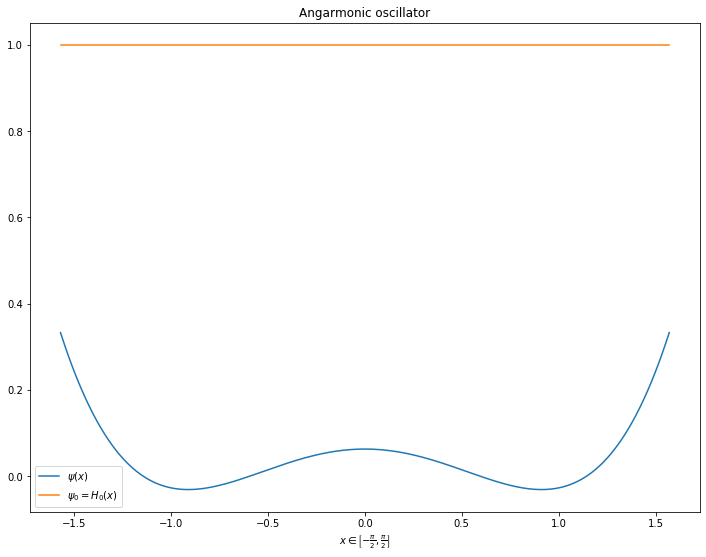

In [8]:
fig = plt.figure(figsize = (12, 9))


plt.plot(x, psi.linspace(nodes)[1], label="$\\psi(x)$")
plt.plot(x, psi_0.linspace(nodes)[1], label="$\\psi_0=H_0(x)$")
plt.legend()

plt.xlabel("$x\\in\\left[-\\frac{\\pi}{2}, \\frac{\\pi}{2}\\right]$")
plt.title("Angarmonic oscillator")

plt.show()

In [9]:
#Coefficients of Hermite polynomials
psi

Hermite([0.40439719, 0.        , 0.48141337, 0.        , 0.05173698], domain=[-1.57079633,  1.57079633], window=[-1,  1])